In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [8]:
image_path = "../outputs/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

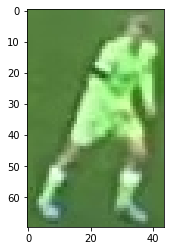

In [11]:
plt.imshow(image)

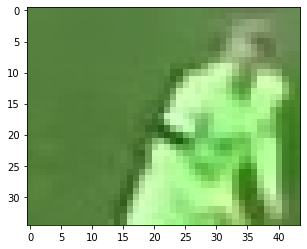

In [12]:
top_half_image = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

In [24]:
image_2d = top_half_image.reshape(-1, 3)

kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

labels = kmeans.labels_

clustured_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

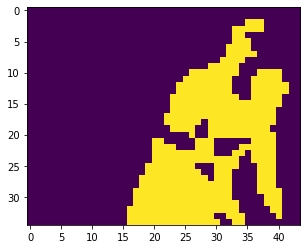

In [21]:
plt.imshow(clustured_image)

In [23]:
# corners would indicate the color of the field
# other one would be player colour tshirt

In [26]:
corner_clusters = [clustured_image[0, 0], clustured_image[0, -1], clustured_image[-1, 0], clustured_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

0


In [27]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

1


In [28]:
kmeans.cluster_centers_[player_cluster]

array([168.47575058, 231.7482679 , 142.47575058])